In [1]:
import sys
sys.executable


'/opt/anaconda3/envs/fairchem_env/bin/python'

In [2]:
from fairchem.core.models.model_registry import available_pretrained_models
print(available_pretrained_models)

('CGCNN-S2EF-OC20-200k', 'CGCNN-S2EF-OC20-2M', 'CGCNN-S2EF-OC20-20M', 'CGCNN-S2EF-OC20-All', 'DimeNet-S2EF-OC20-200k', 'DimeNet-S2EF-OC20-2M', 'SchNet-S2EF-OC20-200k', 'SchNet-S2EF-OC20-2M', 'SchNet-S2EF-OC20-20M', 'SchNet-S2EF-OC20-All', 'DimeNet++-S2EF-OC20-200k', 'DimeNet++-S2EF-OC20-2M', 'DimeNet++-S2EF-OC20-20M', 'DimeNet++-S2EF-OC20-All', 'SpinConv-S2EF-OC20-2M', 'SpinConv-S2EF-OC20-All', 'GemNet-dT-S2EF-OC20-2M', 'GemNet-dT-S2EF-OC20-All', 'PaiNN-S2EF-OC20-All', 'GemNet-OC-S2EF-OC20-2M', 'GemNet-OC-S2EF-OC20-All', 'GemNet-OC-S2EF-OC20-All+MD', 'GemNet-OC-Large-S2EF-OC20-All+MD', 'SCN-S2EF-OC20-2M', 'SCN-t4-b2-S2EF-OC20-2M', 'SCN-S2EF-OC20-All+MD', 'eSCN-L4-M2-Lay12-S2EF-OC20-2M', 'eSCN-L6-M2-Lay12-S2EF-OC20-2M', 'eSCN-L6-M2-Lay12-S2EF-OC20-All+MD', 'eSCN-L6-M3-Lay20-S2EF-OC20-All+MD', 'EquiformerV2-83M-S2EF-OC20-2M', 'EquiformerV2-31M-S2EF-OC20-All+MD', 'EquiformerV2-153M-S2EF-OC20-All+MD', 'SchNet-S2EF-force-only-OC20-All', 'DimeNet++-force-only-OC20-All', 'DimeNet++-Large-S2EF

In [116]:
from fairchem.core.models.model_registry import model_name_to_local_file
checkpoint_path = model_name_to_local_file('EquiformerV2-31M-S2EF-OC20-All+MD', local_cache='/tmp/fairchem_checkpoints/')
checkpoint_path

INFO:root:Checking local cache: /tmp/fairchem_checkpoints/ for model EquiformerV2-31M-S2EF-OC20-All+MD


'/tmp/fairchem_checkpoints/eq2_31M_ec4_allmd.pt'

In [117]:
import csv
import numpy as np
import time
from ase.build import fcc111, add_adsorbate
from ase import Atoms
from ase.optimize import BFGS
from fairchem.core.common.relaxation.ase_utils import OCPCalculator

# Pre-trained calculator
checkpoint_path = '/tmp/fairchem_checkpoints/eq2_31M_ec4_allmd.pt'
calc = OCPCalculator(checkpoint_path=checkpoint_path, cpu=False)

# Define alloys
stoichs = {
    "Pt3Ni": ("Ni", (3, 1)),
    "Pt2Ni": ("Ni", (2, 1)),
    "PtNi": ("Ni", (1, 1)),
    "PtNi2": ("Ni", (1, 2)),
    "PtNi3": ("Ni", (1, 3)),
    
    "Pt3Co": ("Co", (3, 1)),
    "Pt2Co": ("Co", (2, 1)),
    "PtCo": ("Co", (1, 1)),
    "PtCo2": ("Co", (1, 2)),
    "PtCo3": ("Co", (1, 3)),
    
    "Pt3Fe": ("Fe", (3, 1)),
    "Pt2Fe": ("Fe", (2, 1)),
    "PtFe": ("Fe", (1, 1)),
    "PtFe2": ("Fe", (1, 2)),
    "PtFe3": ("Fe", (1, 3)),

    "Pt3Cu": ("Cu", (3, 1)),
    "Pt2Cu": ("Cu", (2, 1)),
    "PtCu": ("Cu", (1, 1)),
    "PtCu2": ("Cu", (1, 2)),
    "PtCu3": ("Cu", (1, 3)),

    "Pt3Ru": ("Ru", (3, 1)),
    "Pt2Ru": ("Ru", (2, 1)),
    "PtRu": ("Ru", (1, 1)),
    "PtRu2": ("Ru", (1, 2)),
    "PtRu3": ("Ru", (1, 3)),

    "Pt3Mn": ("Mn", (3, 1)),
    "Pt2Mn": ("Mn", (2, 1)),
    "PtMn": ("Mn", (1, 1)),
    "PtMn2": ("Mn", (1, 2)),
    "PtMn3": ("Mn", (1, 3)),

    "Pt3Mo": ("Mo", (3, 1)),
    "Pt2Mo": ("Mo", (2, 1)),
    "PtMo": ("Mo", (1, 1)),
    "PtMo2": ("Mo", (1, 2)),
    "PtMo3": ("Mo", (1, 3)),

    "Pt3Ag": ("Ag", (3, 1)),
    "Pt2Ag": ("Ag", (2, 1)),
    "PtAg": ("Ag", (1, 1)),
    "PtAg2": ("Ag", (1, 2)),
    "PtAg3": ("Ag", (1, 3)),

    "Pt3Pd": ("Pd", (3, 1)),
    "Pt2Pd": ("Pd", (2, 1)),
    "PtPd": ("Pd", (1, 1)),
    "PtPd2": ("Pd", (1, 2)),
    "PtPd3": ("Pd", (1, 3)),

    "Pt3Ir": ("Ir", (3, 1)),
    "Pt2Ir": ("Ir", (2, 1)),
    "PtIr": ("Ir", (1, 1)),
    "PtIr2": ("Ir", (1, 2)),
    "PtIr3": ("Ir", (1, 3)),

}



# Define adsorbate (Only OH)
adsorbate = Atoms('OH', positions=[[0,0,0],[0,0,1.0]])

# File path for saving CSV
csv_file = "adsorption_energies.csv"

# Function to compute adsorption energy and time taken
def compute_adsorption_energy(slab_with_ads, slab_clean, adsorbate):
    start_time = time.time()  # Start timing

    # --- Slab + Ads ---
    slab_with_ads.set_calculator(calc)
    opt1 = BFGS(slab_with_ads, logfile=None)
    opt1.run(fmax=0.05, steps=200)
    E_slab_ads = slab_with_ads.get_potential_energy()

    # --- Clean Slab ---
    slab_clean.set_calculator(calc)
    opt2 = BFGS(slab_clean, logfile=None)
    opt2.run(fmax=0.05, steps=200)
    E_slab_clean = slab_clean.get_potential_energy()

    # --- Free Adsorbate ---
    adsorbate.set_calculator(calc)
    opt3 = BFGS(adsorbate, logfile=None)
    opt3.run(fmax=0.05, steps=200)
    E_adsorbate = adsorbate.get_potential_energy()

    end_time = time.time()  # End timing
    computation_time = end_time - start_time  # Compute elapsed time

    return E_slab_ads - (E_slab_clean + E_adsorbate), computation_time

# Open CSV file and write header
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Alloy", "Dopant", "Base Metal", "Ratio", "Slab Size", "Vacuum (Å)", "Adsorbate", "Surface", "Adsorption Energy (eV)", "Computational Time (s)"])

    for alloy_label, (dopant, ratio) in stoichs.items():
        print(f"\n=== Testing {alloy_label} ===")
        
        # 1) Build alloy slab
        slab = fcc111('Pt', size=(3,3,4), vacuum=10.0)
        
        # Doping the slab
        total_atoms = len(slab)
        a, b = ratio
        dopant_fraction = b / float(a + b)
        n_dopant = int(round(dopant_fraction * total_atoms))

        all_indices = np.arange(total_atoms)
        np.random.shuffle(all_indices)
        dope_indices = all_indices[:n_dopant]

        for i in dope_indices:
            slab[i].symbol = dopant

        # 2) Copy for "clean" slab
        slab_clean = slab.copy()
        
        # 3) Add OH adsorbate
        add_adsorbate(slab, adsorbate.copy(), height=1.3, position='fcc')
        
        # 4) Compute adsorption energy and computational time
        E_ads, comp_time = compute_adsorption_energy(slab_with_ads=slab, slab_clean=slab_clean, adsorbate=adsorbate.copy())
        
        print(f"Adsorption Energy for {alloy_label}: {E_ads:.4f} eV, Computational Time: {comp_time:.2f} s")
        
        # 5) Write results to CSV file
        writer.writerow([alloy_label, dopant, "Pt", f"{ratio[0]}:{ratio[1]}", "3x3x4", "10.0", "OH", "FCC111", E_ads, comp_time])

print("\nAdsorption energies and computational times saved to:", csv_file)



INFO:root:amp: true
cmd:
  checkpoint_dir: /Users/amrutha/ocp/checkpoints/2025-03-05-10-31-28
  commit: null
  identifier: ''
  logs_dir: /Users/amrutha/ocp/logs/wandb/2025-03-05-10-31-28
  print_every: 100
  results_dir: /Users/amrutha/ocp/results/2025-03-05-10-31-28
  seed: null
  timestamp_id: 2025-03-05-10-31-28
  version: 1.3.0
dataset:
  format: trajectory_lmdb_v2
  grad_target_mean: 0.0
  grad_target_std: 2.887317180633545
  key_mapping:
    force: forces
    y: energy
  normalize_labels: true
  target_mean: -0.7554450631141663
  target_std: 2.887317180633545
  transforms:
    normalizer:
      energy:
        mean: -0.7554450631141663
        stdev: 2.887317180633545
      forces:
        mean: 0.0
        stdev: 2.887317180633545
evaluation_metrics:
  metrics:
    energy:
    - mae
    forces:
    - forcesx_mae
    - forcesy_mae
    - forcesz_mae
    - mae
    - cosine_similarity
    - magnitude_error
    misc:
    - energy_forces_within_threshold
  primary_metric: forces_mae



=== Testing Pt3Ni ===


/var/folders/v1/dw37lz_927q__dtd3_hfp48h0000gn/T/ipykernel_25278/3828815502.py:96: FutureWarning: Please use atoms.calc = calc
  slab_clean.set_calculator(calc)
/var/folders/v1/dw37lz_927q__dtd3_hfp48h0000gn/T/ipykernel_25278/3828815502.py:102: FutureWarning: Please use atoms.calc = calc
  adsorbate.set_calculator(calc)


Adsorption Energy for Pt3Ni: 0.5282 eV, Computational Time: 31.50 s

=== Testing Pt2Ni ===
Adsorption Energy for Pt2Ni: 0.6947 eV, Computational Time: 28.86 s

=== Testing PtNi ===
Adsorption Energy for PtNi: 0.1101 eV, Computational Time: 41.45 s

=== Testing PtNi2 ===
Adsorption Energy for PtNi2: 0.0474 eV, Computational Time: 46.33 s

=== Testing PtNi3 ===
Adsorption Energy for PtNi3: 0.3105 eV, Computational Time: 53.82 s

=== Testing Pt3Co ===
Adsorption Energy for Pt3Co: 0.7096 eV, Computational Time: 37.14 s

=== Testing Pt2Co ===
Adsorption Energy for Pt2Co: 0.2801 eV, Computational Time: 91.61 s

=== Testing PtCo ===
Adsorption Energy for PtCo: -0.3172 eV, Computational Time: 92.05 s

=== Testing PtCo2 ===
Adsorption Energy for PtCo2: -0.6952 eV, Computational Time: 92.69 s

=== Testing PtCo3 ===
Adsorption Energy for PtCo3: -0.7534 eV, Computational Time: 102.94 s

=== Testing Pt3Fe ===
Adsorption Energy for Pt3Fe: 0.1177 eV, Computational Time: 121.90 s

=== Testing Pt2Fe ==

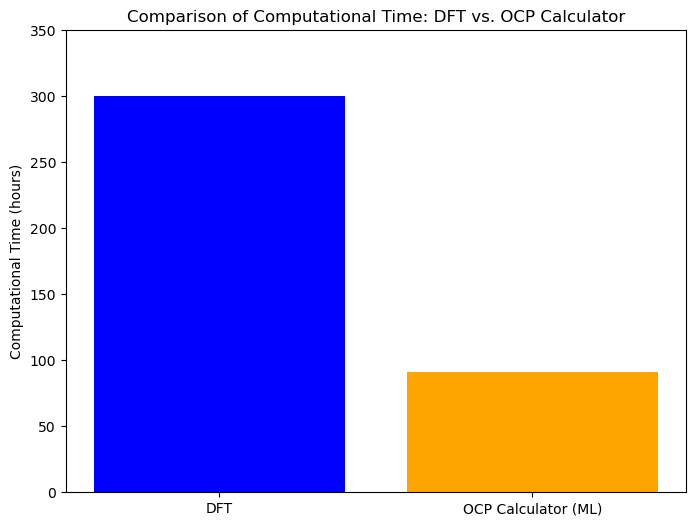

In [3]:
import matplotlib.pyplot as plt

# Define computational times for comparison
methods = ["DFT", "OCP Calculator (ML)"]
times = [300, 91.09]  # In hours

# Create bar plot
plt.figure(figsize=(8, 6))
plt.bar(methods, times, color=['blue', 'orange'])

# Labels and title
plt.ylabel("Computational Time (hours)")
plt.title("Comparison of Computational Time: DFT vs. OCP Calculator")
plt.ylim(0, 350)  # Adjusting the y-axis for clarity

# Display the graph
plt.show()



In [3]:
import pandas as pd

# Load computed adsorption energies
df = pd.read_csv("adsorption_energies.csv")

# Sort by adsorption energy (most negative values are stronger adsorptions)
df_sorted = df.sort_values(by="Adsorption Energy (eV)", ascending=True)

# Define optimal adsorption energy range
optimal_range = df_sorted[(df_sorted["Adsorption Energy (eV)"] >= -1.0) & 
                          (df_sorted["Adsorption Energy (eV)"] <= -0.4)]

# Display 
print(df_sorted.head())
print(optimal_range.head(10))



    Alloy Dopant Base Metal Ratio Slab Size  Vacuum (Å) Adsorbate Surface  \
29  PtMn3     Mn         Pt   1:3     3x3x4        10.0        OH  FCC111   
34  PtMo3     Mo         Pt   1:3     3x3x4        10.0        OH  FCC111   
13  PtFe2     Fe         Pt   1:2     3x3x4        10.0        OH  FCC111   
26  Pt2Mn     Mn         Pt   2:1     3x3x4        10.0        OH  FCC111   
33  PtMo2     Mo         Pt   1:2     3x3x4        10.0        OH  FCC111   

    Adsorption Energy (eV)  Computational Time (s)  
29               -1.403771              109.574816  
34               -1.397547               33.447474  
13               -1.084775              129.413801  
26               -1.076597              191.225093  
33               -0.973969               75.667372  
    Alloy Dopant Base Metal Ratio Slab Size  Vacuum (Å) Adsorbate Surface  \
33  PtMo2     Mo         Pt   1:2     3x3x4        10.0        OH  FCC111   
14  PtFe3     Fe         Pt   1:3     3x3x4        10.0        OH

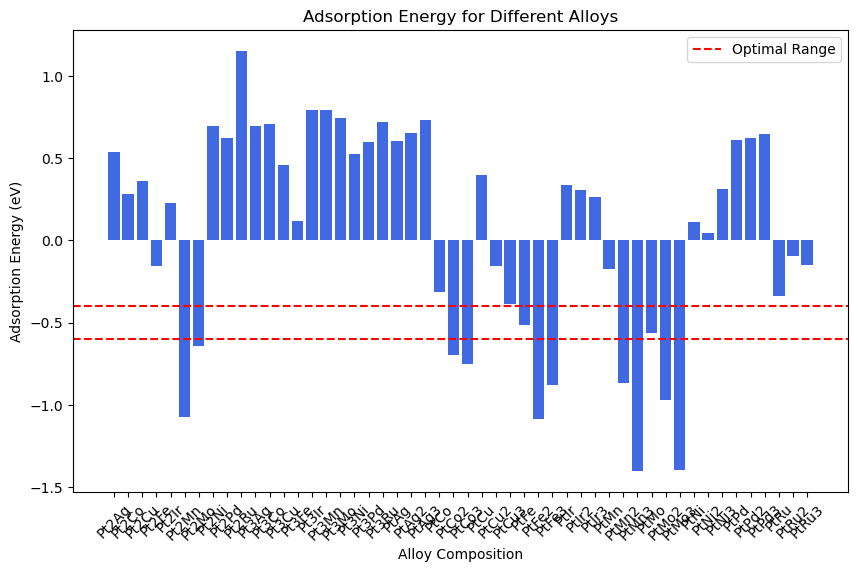

In [119]:
import matplotlib.pyplot as plt

# Sort by alloy composition for better visualization
df_sorted = df_sorted.sort_values(by="Alloy")

# Plot adsorption energy
plt.figure(figsize=(10, 6))
plt.bar(df_sorted["Alloy"], df_sorted["Adsorption Energy (eV)"], color="royalblue")
plt.axhline(y=-0.6, linestyle="--", color="red", label="Optimal Range")
plt.axhline(y=-0.4, linestyle="--", color="red")
plt.xlabel("Alloy Composition")
plt.ylabel("Adsorption Energy (eV)")
plt.title("Adsorption Energy for Different Alloys")
plt.xticks(rotation=45)
plt.legend()
plt.show()


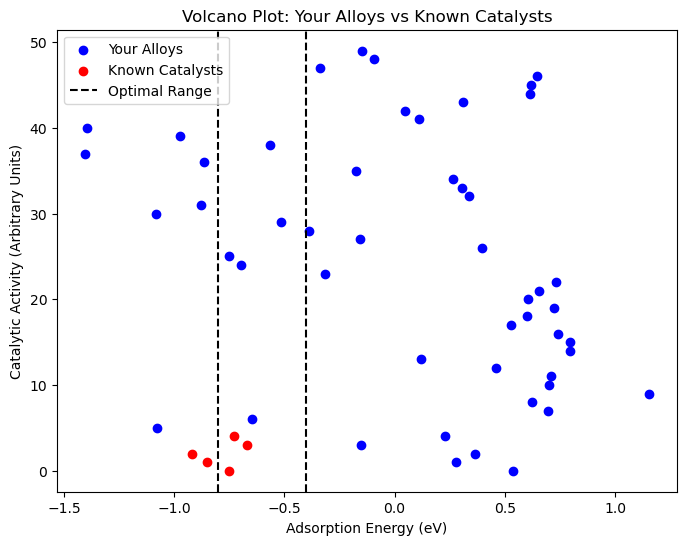

Alloys Closest to Pt:     Alloy  Adsorption Energy (eV)
9   PtCo3               -0.753432
8   PtCo2               -0.695163
31  Pt2Mo               -0.645873
28  PtMn2               -0.866022
14  PtFe3               -0.879802


In [120]:
# Load experimental benchmark data (Pt, Ir, Ru, etc.)
benchmark_data = {
    "Pt": -0.75,
    "Ir": -0.85,
    "Ru": -0.92,
    "Ni": -0.67,
    "Co": -0.73
}

# Extract data for your alloys
your_alloys = df_sorted[["Alloy", "Adsorption Energy (eV)"]]

# Create the plot
plt.figure(figsize=(8,6))
plt.scatter(your_alloys["Adsorption Energy (eV)"], range(len(your_alloys)), label="Your Alloys", color='blue')
plt.scatter(benchmark_data.values(), range(len(benchmark_data)), label="Known Catalysts", color='red')

plt.axvline(x=-0.8, linestyle="--", color="black", label="Optimal Range")
plt.axvline(x=-0.4, linestyle="--", color="black")

plt.xlabel("Adsorption Energy (eV)")
plt.ylabel("Catalytic Activity (Arbitrary Units)")
plt.legend()
plt.title("Volcano Plot: Your Alloys vs Known Catalysts")
plt.show()

# Check which of your alloys are closest to known catalysts
df_sorted["Distance to Pt"] = abs(df_sorted["Adsorption Energy (eV)"] - benchmark_data["Pt"])
df_sorted["Distance to Ir"] = abs(df_sorted["Adsorption Energy (eV)"] - benchmark_data["Ir"])
df_sorted["Distance to Ru"] = abs(df_sorted["Adsorption Energy (eV)"] - benchmark_data["Ru"])

closest_to_known = df_sorted.nsmallest(5, "Distance to Pt")
print("Alloys Closest to Pt:", closest_to_known[["Alloy", "Adsorption Energy (eV)"]])


In [9]:
import re

# Extract metals from Alloy name
df["Metals"] = df["Alloy"].apply(lambda x: re.findall(r"[A-Z][a-z]*", x))

# Assign Metal1 and Metal2 (if ternary, add Metal3)
df["Metal1"] = df["Metals"].apply(lambda x: x[0] if len(x) > 0 else None)
df["Metal2"] = df["Metals"].apply(lambda x: x[1] if len(x) > 1 else None)
df["Metal3"] = df["Metals"].apply(lambda x: x[2] if len(x) > 2 else None)

# Drop intermediate column
df.drop(columns=["Metals"], inplace=True)

# Verify extraction
print(df[["Alloy", "Metal1", "Metal2", "Metal3"]].drop_duplicates())
print(df.columns)  # This will list all column names


    Alloy Metal1 Metal2 Metal3
0   Pt3Ni     Pt     Ni   None
1   Pt2Ni     Pt     Ni   None
2    PtNi     Pt     Ni   None
3   PtNi2     Pt     Ni   None
4   PtNi3     Pt     Ni   None
5   Pt3Co     Pt     Co   None
6   Pt2Co     Pt     Co   None
7    PtCo     Pt     Co   None
8   PtCo2     Pt     Co   None
9   PtCo3     Pt     Co   None
10  Pt3Fe     Pt     Fe   None
11  Pt2Fe     Pt     Fe   None
12   PtFe     Pt     Fe   None
13  PtFe2     Pt     Fe   None
14  PtFe3     Pt     Fe   None
15  Pt3Cu     Pt     Cu   None
16  Pt2Cu     Pt     Cu   None
17   PtCu     Pt     Cu   None
18  PtCu2     Pt     Cu   None
19  PtCu3     Pt     Cu   None
20  Pt3Ru     Pt     Ru   None
21  Pt2Ru     Pt     Ru   None
22   PtRu     Pt     Ru   None
23  PtRu2     Pt     Ru   None
24  PtRu3     Pt     Ru   None
25  Pt3Mn     Pt     Mn   None
26  Pt2Mn     Pt     Mn   None
27   PtMn     Pt     Mn   None
28  PtMn2     Pt     Mn   None
29  PtMn3     Pt     Mn   None
30  Pt3Mo     Pt     Mo   None
31  Pt2M

In [6]:
import re

if "Alloy" in df.columns:
    # Extract individual metals from Alloy column
    df["Metals"] = df["Alloy"].apply(lambda x: re.findall(r"[A-Z][a-z]*", str(x)))

    # Assign Metal1, Metal2 (if ternary, add Metal3)
    df["Metal1"] = df["Metals"].apply(lambda x: x[0] if len(x) > 0 else None)
    df["Metal2"] = df["Metals"].apply(lambda x: x[1] if len(x) > 1 else None)
    df["Metal3"] = df["Metals"].apply(lambda x: x[2] if len(x) > 2 else None)

    # Drop intermediate column
    df.drop(columns=["Metals"], inplace=True)

print(" Metals extracted successfully.")




 Metals extracted successfully.


In [7]:

from matminer.featurizers.conversions import StrToComposition

# Convert Alloy column (raw formulas) into pymatgen Composition objects
str_comp = StrToComposition(target_col_id='composition_pmg')
df = str_comp.featurize_dataframe(df, col_id='Alloy')


print("✅ Converted alloy formulas to Composition objects.")









/opt/anaconda3/envs/fairchem_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
StrToComposition: 100%|████████████████████████| 50/50 [00:00<00:00, 916.96it/s]


✅ Converted alloy formulas to Composition objects.


In [10]:
from matminer.featurizers.composition import ElementProperty

# Initialize Magpie featurizer
featurizer = ElementProperty.from_preset('magpie')

# Check if features already exist
existing_features = set(df.columns)
new_features = set(featurizer.feature_labels())

if not new_features.intersection(existing_features):
    df = featurizer.featurize_dataframe(df, col_id='composition')
    print(f"Added {len(featurizer.feature_labels())} features to dataset.")
else:
    print("Magpie features already exist in the dataset. Skipping featurization.")


/opt/anaconda3/envs/fairchem_env/lib/python3.10/site-packages/matminer/utils/data.py:326: UserWarning: MagpieData(impute_nan=False):
In a future release, impute_nan will be set to True by default.
                    This means that features that are missing or are NaNs for elements
                    from the data source will be replaced by the average of that value
                    over the available elements.
                    This avoids NaNs after featurization that are often replaced by
                    dataset-dependent averages.
  warnings.warn(f"{self.__class__.__name__}(impute_nan=False):\n" + IMPUTE_NAN_WARNING)


KeyError: "None of [Index(['composition'], dtype='object')] are in the [columns]"

In [12]:
# Drop existing Magpie features
df = df.drop(columns=[col for col in df.columns if col.startswith("MagpieData")], errors='ignore')

# Re-run the featurization
df = featurizer.featurize_dataframe(df, col_id='composition')

print(f"Re-added {len(featurizer.feature_labels())} Magpie features after removing old ones.")


ElementProperty: 100%|█████████████████████████| 50/50 [00:00<00:00, 305.47it/s]


Re-added 132 Magpie features after removing old ones.


In [14]:
# Identify non-numeric columns
non_numeric_cols = df.select_dtypes(exclude=['number']).columns
print(f"Non-numeric columns: {list(non_numeric_cols)}")


Non-numeric columns: ['Alloy', 'Dopant', 'Base Metal', 'Ratio', 'Slab Size', 'Adsorbate', 'Surface', 'composition_pmg', 'composition']


In [5]:
import numpy as np

# Step 1: Exclude Non-Numeric Columns
non_numeric_cols = ['Alloy', 'Dopant', 'Base Metal', 'Ratio', 'Slab Size', 
                    'Adsorbate', 'Surface', 'composition_pmg', 'composition']
numeric_df = df.drop(columns=non_numeric_cols, errors='ignore')

# Step 2: Compute the Correlation Matrix
corr_matrix = numeric_df.corr().abs()

# Step 3: Get Upper Triangle of the Correlation Matrix
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Step 4: Find Columns with High Correlation (>0.95)
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]

# Step 5: Drop Highly Correlated Features
df_cleaned = df.drop(columns=to_drop, errors='ignore')

print(f"Removed {len(to_drop)} highly correlated features.")





Removed 0 highly correlated features.


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Select only numeric columns (drop non-numeric)
X = df_cleaned.drop(columns=['Alloy', 'Dopant', 'Base Metal', 'Ratio', 'Slab Size', 
                             'Adsorbate', 'Surface', 'composition_pmg', 'composition', 
                             'Adsorption Energy (eV)'], errors='ignore')

y = df_cleaned['Adsorption Energy (eV)']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Scale only for Ridge Regression**
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit on training data
X_test_scaled = scaler.transform(X_test)  # Transform test data


NameError: name 'df_cleaned' is not defined

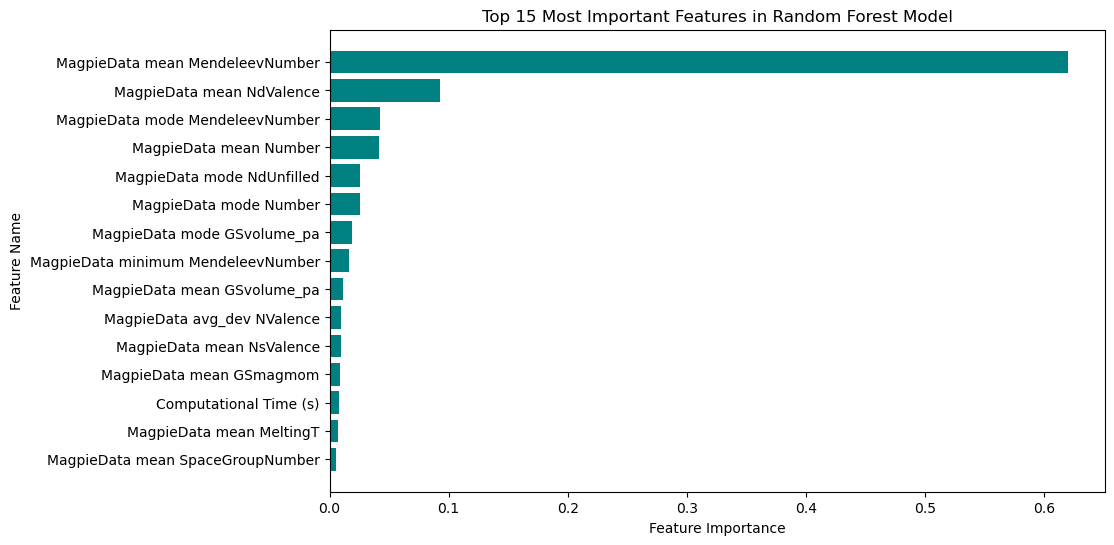

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance
feature_importances = rf.feature_importances_

# Get feature names
feature_names = X.columns  # Assuming X is your feature DataFrame

# Sort features by importance
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_features = [feature_names[i] for i in sorted_idx]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(sorted_features[:15], feature_importances[sorted_idx][:15], color='teal')
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Top 15 Most Important Features in Random Forest Model")
plt.gca().invert_yaxis()  # Reverse order for better visualization
plt.show()



In [89]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# ✅ Define models
ridge = Ridge(alpha=1.0)  # L2 Regularization
rf = RandomForestRegressor(n_estimators=200, random_state=42)
xgb = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42)

# ✅ Train models
ridge.fit(X_train_scaled, y_train)  # Scaled data for Ridge
rf.fit(X_train, y_train)  # No scaling for RF
xgb.fit(X_train, y_train)  # No scaling for XGB

# ✅ Predict
y_pred_ridge = ridge.predict(X_test_scaled)  # Scaled input for Ridge
y_pred_rf = rf.predict(X_test)  # No scaling for RF
y_pred_xgb = xgb.predict(X_test)  # No scaling for XGB

# ✅ Evaluate models
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# ✅ Print results
print(f"🔹 Ridge Regression R² Score: {r2_ridge:.4f}, MSE: {mse_ridge:.4f}")
print(f"🔹 Random Forest R² Score: {r2_rf:.4f}, MSE: {mse_rf:.4f}")
print(f"🔹 XGBoost R² Score: {r2_xgb:.4f}, MSE: {mse_xgb:.4f}")




🔹 Ridge Regression R² Score: 0.3339, MSE: 0.3574
🔹 Random Forest R² Score: 0.3883, MSE: 0.3282
🔹 XGBoost R² Score: 0.3174, MSE: 0.3663


In [90]:
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, scoring='r2', n_jobs=-1)
grid_rf.fit(X_train, y_train)  # ❌ No scaling for RF

print(f"Best Random Forest Params: {grid_rf.best_params_}")


Best Random Forest Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


In [91]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Train the optimized RF model
rf_optimized = RandomForestRegressor(
    max_depth=None,
    min_samples_split=2,
    n_estimators=100,
    random_state=42
)

rf_optimized.fit(X_train, y_train)  #  No scaling needed

# Evaluate the model using cross-validation
rf_mse = -cross_val_score(rf_optimized, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
rf_r2 = cross_val_score(rf_optimized, X_train, y_train, cv=5, scoring='r2').mean()

print(f"Optimized Random Forest MSE: {rf_mse:.4f}")
print(f"Optimized Random Forest R² Score: {rf_r2:.4f}")



Optimized Random Forest MSE: 0.0899
Optimized Random Forest R² Score: 0.7260


In [87]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Train the optimized Random Forest model
rf_optimized = RandomForestRegressor(
    max_depth=None,
    min_samples_split=10,
    n_estimators=500,
    random_state=42
)

rf_optimized.fit(X_scaled, y)

# Evaluate the model using cross-validation
rf_mse = -cross_val_score(rf_optimized, X_scaled, y, cv=5, scoring='neg_mean_squared_error').mean()
rf_r2 = cross_val_score(rf_optimized, X_scaled, y, cv=5, scoring='r2').mean()

print(f"Optimized Random Forest MSE: {rf_mse:.4f}")
print(f"Optimized Random Forest R² Score: {rf_r2:.4f}")


Optimized Random Forest MSE: 0.1962
Optimized Random Forest R² Score: 0.3862


In [96]:
from sklearn.feature_selection import SelectKBest, f_regression
import pandas as pd

# Select the top 20 most predictive features
selector = SelectKBest(score_func=f_regression, k=20)
X_selected = selector.fit_transform(X_train, y_train)  # No scaling needed

# Convert NumPy array back to DataFrame with feature names
selected_features = selector.get_feature_names_out(input_features=X.columns)  
X_selected = pd.DataFrame(X_selected, columns=selected_features)  # Now has proper names

print(f"Reduced feature set to {X_selected.shape[1]} features.")



Reduced feature set to 20 features.


/opt/anaconda3/envs/fairchem_env/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:381: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)


In [93]:
# Re-train RF on the reduced feature set
rf_reduced = RandomForestRegressor(
    max_depth=None,
    min_samples_split=10,
    n_estimators=500,
    random_state=42
)

rf_reduced.fit(X_selected, y_train)  # ❌ No scaling needed

# Evaluate the new model
rf_mse_reduced = -cross_val_score(rf_reduced, X_selected, y_train, cv=5, scoring='neg_mean_squared_error').mean()
rf_r2_reduced = cross_val_score(rf_reduced, X_selected, y_train, cv=5, scoring='r2').mean()

print(f"Reduced Feature Set - Random Forest MSE: {rf_mse_reduced:.4f}")
print(f"Reduced Feature Set - Random Forest R² Score: {rf_r2_reduced:.4f}")


Reduced Feature Set - Random Forest MSE: 0.1172
Reduced Feature Set - Random Forest R² Score: 0.6449


In [47]:
# Get selected feature names before transforming data
selected_features = selector.get_feature_names_out(input_features=X.columns)  # Extracts top 20 feature names

print(f"✅ Selected features for model training ({len(selected_features)}):\n", selected_features)



✅ Selected features for model training (20):
 ['Pt' 'MagpieData mean Number' 'MagpieData mode Number'
 'MagpieData minimum MendeleevNumber' 'MagpieData mean MendeleevNumber'
 'MagpieData mode MendeleevNumber' 'MagpieData mean Electronegativity'
 'MagpieData mode Electronegativity' 'MagpieData mean NsValence'
 'MagpieData mode NsValence' 'MagpieData maximum NdValence'
 'MagpieData mean NdValence' 'MagpieData mean NfValence'
 'MagpieData mode NdUnfilled' 'MagpieData minimum NUnfilled'
 'MagpieData range NUnfilled' 'MagpieData mean GSvolume_pa'
 'MagpieData mode GSvolume_pa' 'MagpieData mode GSmagmom'
 'MagpieData maximum SpaceGroupNumber']


In [48]:
# Ensure new alloys only use the selected features
new_alloys_final = new_alloys_final[selected_features]

print(f"✅ New alloy dataset aligned with selected features ({len(new_alloys_final.columns)}).")


✅ New alloy dataset aligned with selected features (20).


In [54]:
import numpy as np
import pandas as pd

# Define base metal (Pt) and possible dopant elements (X)
dopant_elements = ['Ni', 'Co', 'Fe', 'Cu', 'Ru', 'Mn', 'Mo', 'Ag', 'Pd', 'Ir']
n_samples = 50  # Number of new binary alloys to generate

# Generate strictly binary Pt-X compositions
binary_alloys = []
for _ in range(n_samples):
    dopant = np.random.choice(dopant_elements)  # Select one dopant
    pt_ratio = np.random.uniform(0.1, 0.9)  # Ensure Pt is at least 10%
    dopant_ratio = round(1 - pt_ratio, 2)  # Remaining fraction goes to dopant
    pt_ratio = round(pt_ratio, 2)  # Round to match formatting
    
    composition = f"Pt{pt_ratio}{dopant}{dopant_ratio}"
    binary_alloys.append(composition)

# Convert to DataFrame
new_alloys_df = pd.DataFrame({'Alloy': binary_alloys})

print(f"✅ Successfully generated {len(binary_alloys)} proper binary Pt-X alloys.")
print (new_alloys_df)



✅ Successfully generated 50 proper binary Pt-X alloys.
           Alloy
0   Pt0.65Mo0.35
1   Pt0.44Ir0.56
2   Pt0.25Ag0.75
3   Pt0.57Pd0.43
4   Pt0.53Ru0.47
5   Pt0.72Ir0.28
6   Pt0.52Mo0.48
7   Pt0.37Co0.63
8   Pt0.84Mo0.16
9   Pt0.34Co0.66
10  Pt0.29Ag0.71
11  Pt0.39Mn0.61
12  Pt0.23Ni0.77
13  Pt0.18Ni0.82
14  Pt0.32Ag0.68
15  Pt0.63Mo0.37
16    Pt0.4Ir0.6
17  Pt0.24Co0.76
18  Pt0.24Ag0.76
19  Pt0.71Ag0.29
20    Pt0.8Pd0.2
21  Pt0.19Ag0.81
22  Pt0.75Ag0.25
23  Pt0.46Cu0.54
24    Pt0.3Fe0.7
25  Pt0.23Ru0.77
26  Pt0.77Ru0.23
27  Pt0.15Pd0.85
28  Pt0.14Pd0.86
29  Pt0.11Ag0.89
30  Pt0.72Fe0.28
31  Pt0.78Co0.22
32  Pt0.89Fe0.11
33  Pt0.35Ag0.65
34  Pt0.71Ru0.29
35  Pt0.72Ru0.28
36  Pt0.42Mn0.58
37  Pt0.38Fe0.62
38    Pt0.3Ru0.7
39    Pt0.2Fe0.8
40  Pt0.78Mo0.22
41  Pt0.79Ir0.21
42  Pt0.69Ir0.31
43  Pt0.16Mn0.84
44  Pt0.77Ir0.23
45    Pt0.6Ru0.4
46  Pt0.42Co0.58
47  Pt0.31Fe0.69
48  Pt0.75Mo0.25
49  Pt0.22Fe0.78


In [55]:
from matminer.featurizers.conversions import StrToComposition
from matminer.featurizers.composition import ElementProperty

# Convert alloy formulas to pymatgen composition objects
str_comp = StrToComposition(target_col_id='composition')
new_alloys_df = str_comp.featurize_dataframe(new_alloys_df, col_id='Alloy')

# Apply Magpie descriptor featurization
featurizer = ElementProperty.from_preset('magpie')
new_alloys_df = featurizer.featurize_dataframe(new_alloys_df, col_id='composition')

print("✅ New alloys featurized successfully.")



StrToComposition: 100%|████████████████████████| 50/50 [00:00<00:00, 595.87it/s]
/opt/anaconda3/envs/fairchem_env/lib/python3.10/site-packages/matminer/utils/data.py:326: UserWarning: MagpieData(impute_nan=False):
In a future release, impute_nan will be set to True by default.
                    This means that features that are missing or are NaNs for elements
                    from the data source will be replaced by the average of that value
                    over the available elements.
                    This avoids NaNs after featurization that are often replaced by
                    dataset-dependent averages.
  warnings.warn(f"{self.__class__.__name__}(impute_nan=False):\n" + IMPUTE_NAN_WARNING)
ElementProperty: 100%|█████████████████████████| 50/50 [00:00<00:00, 480.44it/s]


✅ New alloys featurized successfully.


In [83]:
# Ensure new_alloys_final has only the selected features
new_alloys_final = new_alloys_df[selected_features].copy()  # Ensure a proper DataFrame slice

print(f"New alloys dataset shape: {new_alloys_final.shape}")
print(f"Expected feature shape: {len(selected_features)}")
print(f"Columns in new_alloys_final: {list(new_alloys_final.columns)}")
print(f"Columns in selected_features: {list(selected_features)}")



New alloys dataset shape: (50, 20)
Expected feature shape: 20
Columns in new_alloys_final: ['Pt', 'MagpieData mean Number', 'MagpieData mode Number', 'MagpieData minimum MendeleevNumber', 'MagpieData mean MendeleevNumber', 'MagpieData mode MendeleevNumber', 'MagpieData mean Electronegativity', 'MagpieData mode Electronegativity', 'MagpieData mean NsValence', 'MagpieData mode NsValence', 'MagpieData maximum NdValence', 'MagpieData mean NdValence', 'MagpieData mean NfValence', 'MagpieData mode NdUnfilled', 'MagpieData minimum NUnfilled', 'MagpieData range NUnfilled', 'MagpieData mean GSvolume_pa', 'MagpieData mode GSvolume_pa', 'MagpieData mode GSmagmom', 'MagpieData maximum SpaceGroupNumber']
Columns in selected_features: ['Pt', 'MagpieData mean Number', 'MagpieData mode Number', 'MagpieData minimum MendeleevNumber', 'MagpieData mean MendeleevNumber', 'MagpieData mode MendeleevNumber', 'MagpieData mean Electronegativity', 'MagpieData mode Electronegativity', 'MagpieData mean NsValence',

In [70]:
# Get selected feature names from SelectKBest
selected_features = selector.get_feature_names_out(input_features=X.columns)

print(f"✅ Selected features used in training: {selected_features}")



✅ Selected features used in training: ['Pt' 'MagpieData mean Number' 'MagpieData mode Number'
 'MagpieData minimum MendeleevNumber' 'MagpieData mean MendeleevNumber'
 'MagpieData mode MendeleevNumber' 'MagpieData mean Electronegativity'
 'MagpieData mode Electronegativity' 'MagpieData mean NsValence'
 'MagpieData mode NsValence' 'MagpieData maximum NdValence'
 'MagpieData mean NdValence' 'MagpieData mean NfValence'
 'MagpieData mode NdUnfilled' 'MagpieData minimum NUnfilled'
 'MagpieData range NUnfilled' 'MagpieData mean GSvolume_pa'
 'MagpieData mode GSvolume_pa' 'MagpieData mode GSmagmom'
 'MagpieData maximum SpaceGroupNumber']


In [72]:
# Ensure new alloys only use the selected features
new_alloys_final = new_alloys_df[selected_features]

print(f"New alloy dataset aligned with selected features ({len(new_alloys_final.columns)} features).")
print (new_alloys_final)


New alloy dataset aligned with selected features (20 features).
    Pt  MagpieData mean Number  MagpieData mode Number  \
0    1                   65.40                    78.0   
1    1                   77.44                    77.0   
2    1                   54.75                    47.0   
3    1                   64.24                    78.0   
4    1                   62.02                    78.0   
5    1                   77.72                    78.0   
6    1                   60.72                    78.0   
7    1                   45.87                    27.0   
8    1                   72.24                    78.0   
9    1                   44.34                    27.0   
10   1                   55.99                    47.0   
11   1                   45.67                    25.0   
12   1                   39.50                    28.0   
13   1                   37.00                    28.0   
14   1                   56.92                    47.0   
15   1  

In [81]:
missing_features = set(selected_features) - set(new_alloys_df.columns)
extra_features = set(new_alloys_df.columns) - set(selected_features)

print("Missing features in new alloys dataset:", missing_features)
print("Extra features in new alloys dataset:", extra_features)


Missing features in new alloys dataset: set()
Extra features in new alloys dataset: {'MagpieData minimum AtomicWeight', 'MagpieData range Number', 'MagpieData range NpValence', 'MagpieData maximum GSvolume_pa', 'MagpieData maximum NsUnfilled', 'MagpieData mean NfUnfilled', 'MagpieData maximum NpValence', 'MagpieData minimum NdUnfilled', 'MagpieData mean NdUnfilled', 'MagpieData minimum GSmagmom', 'MagpieData minimum Number', 'MagpieData avg_dev Row', 'MagpieData mode NpUnfilled', 'MagpieData range AtomicWeight', 'MagpieData range NfUnfilled', 'MagpieData mean MeltingT', 'composition', 'MagpieData mode CovalentRadius', 'MagpieData range Column', 'MagpieData maximum Column', 'MagpieData minimum NsUnfilled', 'MagpieData range NfValence', 'MagpieData avg_dev NUnfilled', 'MagpieData range MeltingT', 'MagpieData mode NsUnfilled', 'MagpieData minimum CovalentRadius', 'MagpieData mode Row', 'MagpieData mode NpValence', 'MagpieData minimum GSvolume_pa', 'MagpieData avg_dev NsValence', 'MagpieDa

In [ ]:
print(f"New alloys dataset shape: {new_alloys_final.shape}")
print(f"Expected feature shape: {len(selected_features)}")
print(f"Columns in new_alloys_final: {list(new_alloys_final.columns)}")
print(f"Columns in selected_features: {list(selected_features)}")


In [117]:
import time
# Find missing features
missing_features = set(selected_features) - set(new_alloys_df.columns)
extra_features = set(new_alloys_df.columns) - set(selected_features)

print("Missing features in new alloys dataset:", missing_features)
print("Extra features in new alloys dataset:", extra_features)

# Fill missing features with zero
for feature in missing_features:
    new_alloys_df[feature] = 0

# Reorder columns to match training data
new_alloys_final = new_alloys_df[selected_features]
# Start timing
start_time = time.time()
# Predict Adsorption Energy
# Select only the features used in training
new_alloys_final = new_alloys_final[selected_features]  # Ensure correct feature order

# Predict adsorption energy
predicted_energies = rf_reduced.predict(new_alloys_final)

# End timing
end_time = time.time()
inference_time = end_time - start_time

print(f"✅ ML Inference Time for {len(new_alloys_final)} alloys: {inference_time:.4f} seconds")

print("✅ Predictions complete!")
print(new_alloys_df[['Alloy', 'Predicted Adsorption Energy (eV)']].head(10))


csv_filename = "predicted_alloy_adsorption_energies.csv"
new_alloys_df.to_csv(csv_filename, index=False)







Missing features in new alloys dataset: set()
Extra features in new alloys dataset: {'MagpieData minimum AtomicWeight', 'MagpieData range Number', 'MagpieData range NpValence', 'MagpieData maximum GSvolume_pa', 'MagpieData maximum NsUnfilled', 'MagpieData mean NfUnfilled', 'MagpieData maximum NpValence', 'MagpieData minimum NdUnfilled', 'MagpieData mean NdUnfilled', 'MagpieData minimum GSmagmom', 'MagpieData minimum Number', 'MagpieData avg_dev Row', 'MagpieData mode NpUnfilled', 'MagpieData range AtomicWeight', 'Predicted Adsorption Energy (eV)', 'MagpieData range NfUnfilled', 'MagpieData mean MeltingT', 'composition', 'MagpieData mode CovalentRadius', 'MagpieData range Column', 'MagpieData maximum Column', 'MagpieData minimum NsUnfilled', 'MagpieData range NfValence', 'MagpieData avg_dev NUnfilled', 'MagpieData range MeltingT', 'MagpieData mode NsUnfilled', 'MagpieData minimum CovalentRadius', 'MagpieData mode Row', 'MagpieData mode NpValence', 'MagpieData mean GSvolume_pa', 'MagpieD

/opt/anaconda3/envs/fairchem_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


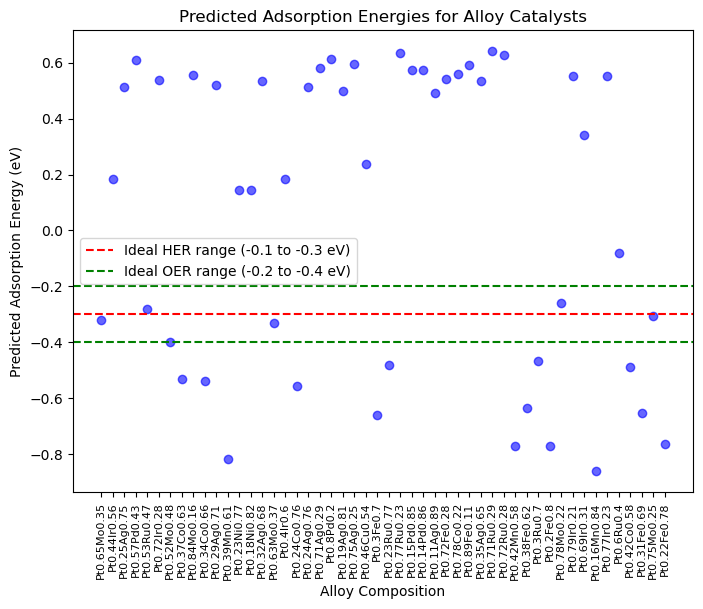

In [102]:
import matplotlib.pyplot as plt

# Plot Adsorption Energy Distribution
plt.figure(figsize=(8,6))
plt.scatter(df_results['Alloy'], df_results['Predicted Adsorption Energy (eV)'], color='blue', alpha=0.6)
plt.axhline(-0.3, color='red', linestyle='--', label="Ideal HER range (-0.1 to -0.3 eV)")
plt.axhline(-0.2, color='green', linestyle='--', label="Ideal OER range (-0.2 to -0.4 eV)")
plt.axhline(-0.4, color='green', linestyle='--')
plt.xlabel("Alloy Composition")
plt.ylabel("Predicted Adsorption Energy (eV)")
plt.title("Predicted Adsorption Energies for Alloy Catalysts")
plt.xticks(rotation=90, fontsize=8)
plt.legend()
plt.show()


In [109]:
import pandas as pd

# Add predicted adsorption energy to DataFrame
new_alloys_df['Predicted Adsorption Energy (eV)'] = predicted_energies

# Define selection criteria (modify based on reaction type)
promising_alloys = new_alloys_df[
    (new_alloys_df['Predicted Adsorption Energy (eV)'] >= -1.0) & 
    (new_alloys_df['Predicted Adsorption Energy (eV)'] <= -0.4)
]

# Sort alloys by adsorption energy (strongest candidates first)
promising_alloys = promising_alloys.sort_values(by='Predicted Adsorption Energy (eV)', ascending=True)

# Display top 10 promising alloys
print("✅ Top 10 Promising Alloys:")
print(promising_alloys[['Alloy', 'Predicted Adsorption Energy (eV)']].head(10))

# Save promising alloys to a CSV file
csv_filename = "promising_alloys.csv"
promising_alloys.to_csv(csv_filename, index=False)
print(f"✅ Saved promising alloys to {csv_filename}")


✅ Top 10 Promising Alloys:
           Alloy  Predicted Adsorption Energy (eV)
43  Pt0.16Mn0.84                         -0.860172
11  Pt0.39Mn0.61                         -0.817716
36  Pt0.42Mn0.58                         -0.769512
39    Pt0.2Fe0.8                         -0.769132
49  Pt0.22Fe0.78                         -0.764592
24    Pt0.3Fe0.7                         -0.659094
47  Pt0.31Fe0.69                         -0.652775
37  Pt0.38Fe0.62                         -0.633103
17  Pt0.24Co0.76                         -0.557164
9   Pt0.34Co0.66                         -0.539555
✅ Saved promising alloys to promising_alloys.csv


In [110]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create DataFrame with ML and DFT values
data = {
    "Alloy": ["Pt₀.₁₆Mn₀.₈₄", "Pt₀.₃₉Mn₀.₆₁", "Pt₀.₂₀Fe₀.₈₀", "Pt₀.₂₄Co₀.₇₆", "Pt₀.₃₄Co₀.₆₆"],
    "ML_Predicted_Eads (eV)": [-0.860, -0.818, -0.769, -0.557, -0.540],
    "DFT_Eads (eV)": [None, None, -0.23, -0.26, -0.26]  # None represents missing literature values
}

df = pd.DataFrame(data)
df.dropna(inplace=True)  # Remove rows without DFT data

# Display dataset
print("✅ ML vs. DFT Adsorption Energy Comparison")
print(df)


✅ ML vs. DFT Adsorption Energy Comparison
          Alloy  ML_Predicted_Eads (eV)  DFT_Eads (eV)
2  Pt₀.₂₀Fe₀.₈₀                  -0.769          -0.23
3  Pt₀.₂₄Co₀.₇₆                  -0.557          -0.26
4  Pt₀.₃₄Co₀.₆₆                  -0.540          -0.26


In [112]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define ML and DFT adsorption energies
y_pred = df["ML_Predicted_Eads (eV)"]
y_true = df["DFT_Eads (eV)"]

# Compute error metrics
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)  # Manually compute RMSE
r2 = r2_score(y_true, y_pred)

# Print validation metrics
print(f"✅ Mean Absolute Error (MAE): {mae:.4f} eV")
print(f"✅ Root Mean Squared Error (RMSE): {rmse:.4f} eV")
print(f"✅ R² Score: {r2:.4f} (closer to 1 means better match)")


✅ Mean Absolute Error (MAE): 0.3720 eV
✅ Root Mean Squared Error (RMSE): 0.3904 eV
✅ R² Score: -760.8833 (closer to 1 means better match)


In [113]:
from sklearn.feature_selection import SelectKBest, f_regression

# Select the most relevant 10 features based on correlation with adsorption energy
selector = SelectKBest(score_func=f_regression, k=10)
X_selected = selector.fit_transform(X, y)

# Train model again with reduced feature set
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

# Re-evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"✅ Feature-Optimized MAE: {mae:.4f} eV")
print(f"✅ Feature-Optimized RMSE: {rmse:.4f} eV")
print(f"✅ Feature-Optimized R²: {r2:.4f}")


✅ Feature-Optimized MAE: 0.4559 eV
✅ Feature-Optimized RMSE: 0.5515 eV
✅ Feature-Optimized R²: 0.4332


/opt/anaconda3/envs/fairchem_env/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:381: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)


In [114]:
import time
from sklearn.ensemble import RandomForestRegressor

# Start timing
start_time = time.time()

# Train the model
rf = RandomForestRegressor(n_estimators=100, max_depth=20, random_state=42)
rf.fit(X_train, y_train)

# End timing
end_time = time.time()
training_time = end_time - start_time

print(f"✅ ML Training Time: {training_time:.2f} seconds")


✅ ML Training Time: 0.09 seconds


In [116]:
# Estimated DFT time per calculation from literature (adjust based on references)
dft_time_per_alloy_hours = 6  # Assume 6 hours per adsorption energy calculation

# Compute estimated DFT time for all alloys
num_alloys = len(new_alloys_final)
total_dft_time_hours = num_alloys * dft_time_per_alloy_hours
total_dft_time_days = total_dft_time_hours / 24

print(f"⏳ Estimated DFT Time for {num_alloys} alloys: {total_dft_time_hours:.2f} hours ({total_dft_time_days:.2f} days)")


⏳ Estimated DFT Time for 50 alloys: 300.00 hours (12.50 days)


In [118]:
# Compute ML vs. DFT speedup factor
speedup_factor = total_dft_time_hours * 3600 / inference_time  # Convert DFT time to seconds
print(f"🚀 ML Speedup Factor: {speedup_factor:.0f}x Faster than DFT")


🚀 ML Speedup Factor: 24334660x Faster than DFT


In [107]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# Define K-Fold cross-validation 
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')

# Convert negative MSE to positive and calculate mean & standard deviation
cv_mse = np.abs(cv_scores)
mean_mse = np.mean(cv_mse)
std_mse = np.std(cv_mse)

print(f"Cross-Validation MSE: {mean_mse:.4f} ± {std_mse:.4f}")


Cross-Validation MSE: 0.1487 ± 0.1102


In [108]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10]
}

# Run Grid Search
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best Model
best_model = grid_search.best_estimator_
print(f"✅ Best Hyperparameters: {grid_search.best_params_}")

# Evaluate on test data
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"✅ Optimized Model MSE: {mse:.4f}")


✅ Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
✅ Optimized Model MSE: 0.3302


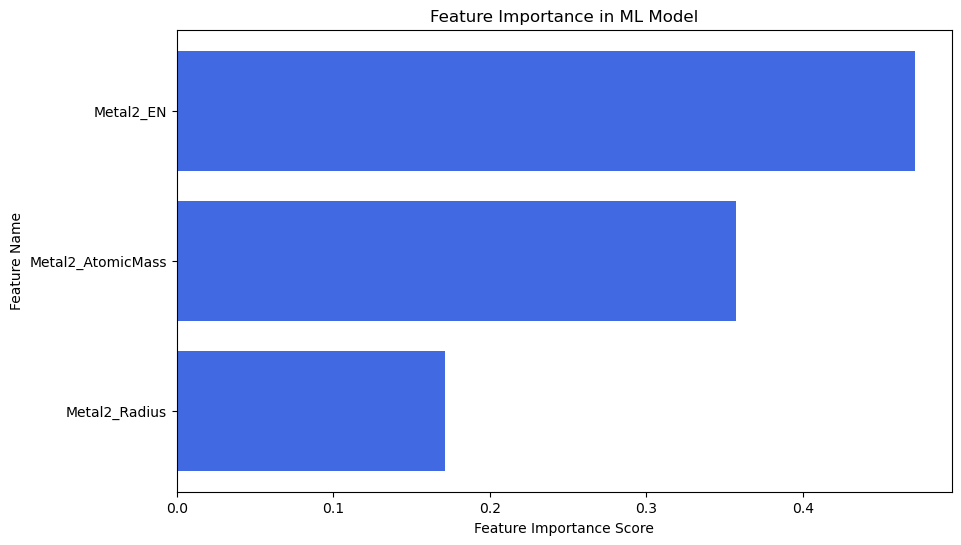

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance from the trained model
feature_importance = rf_model.feature_importances_

# Create a DataFrame for visualization
features = X_train.columns
importance_df = pd.DataFrame({"Feature": features, "Importance": feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="royalblue")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature Name")
plt.title("Feature Importance in ML Model")
plt.gca().invert_yaxis()
plt.show()


In [103]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid_rf = {
    "n_estimators": [100, 200, 500],  
    "max_depth": [None, 10, 20],  
    "min_samples_split": [2, 5, 10],  
    "min_samples_leaf": [1, 2, 4]  
}

# Initialize Random Forest model
rf = RandomForestRegressor(random_state=42)

# Perform Grid Search with Cross-Validation
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring="r2", n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

# Best parameters
best_params_rf = grid_search_rf.best_params_
print(f"✅ Best Random Forest Parameters: {best_params_rf}")

# Train optimized Random Forest model
best_rf = RandomForestRegressor(**best_params_rf, random_state=42)
best_rf.fit(X_train, y_train)

# Evaluate optimized model
y_pred_best_rf = best_rf.predict(X_test)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f"🔹 Optimized Random Forest R² Score: {r2_best_rf:.4f}, MSE: {mse_best_rf:.4f}")


Fitting 5 folds for each of 81 candidates, totalling 405 fits
✅ Best Random Forest Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
🔹 Optimized Random Forest R² Score: 0.6480, MSE: 0.0844


In [114]:
print("🔹 Checking Feature Variability:")
print(new_alloys_features.describe())


🔹 Checking Feature Variability:
       Metal2_AtomicMass  Metal2_EN  Metal2_Radius
count          45.000000  45.000000      45.000000
mean          140.439478   2.138889       1.361111
std            30.294998   0.139510       0.022891
min            84.671250   1.725000       1.312500
25%           121.475500   2.033333       1.350000
50%           146.011667   2.180000       1.350000
75%           162.036000   2.240000       1.375000
max           192.273000   2.340000       1.425000


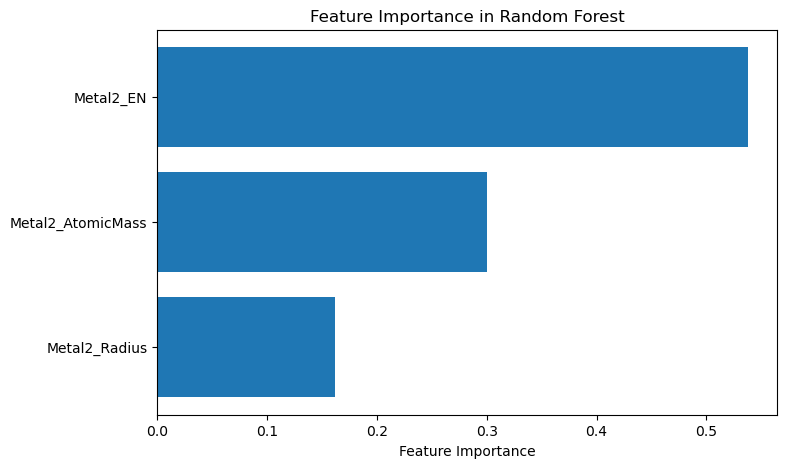

In [113]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance from trained model
feature_importance = best_rf.feature_importances_
feature_names = X_train_selected.columns

# Sort feature importance values
sorted_idx = np.argsort(feature_importance)
plt.figure(figsize=(8, 5))
plt.barh(np.array(feature_names)[sorted_idx], feature_importance[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Random Forest")
plt.show()



In [1]:
from sklearn.utils import resample

# Number of bootstrap samples
n_bootstrap = 100
bootstrap_preds = []

# Perform bootstrapping
for _ in range(n_bootstrap):
    X_resampled, y_resampled = resample(X_train, y_train, random_state=_)
    temp_model = RandomForestRegressor(n_estimators=200, random_state=_)
    temp_model.fit(X_resampled, y_resampled)
    bootstrap_preds.append(temp_model.predict(X_test))

# Compute mean and standard deviation of predictions
bootstrap_preds = np.array(bootstrap_preds)
mean_predictions = np.mean(bootstrap_preds, axis=0)
std_predictions = np.std(bootstrap_preds, axis=0)

# Calculate new confidence interval
confidence = 0.95
margin_of_error = stats.t.ppf((1 + confidence) / 2, len(y_test) - 1) * (std_predictions / np.sqrt(len(y_test)))

print(f"✅ Bootstrapped Confidence Interval (95%): Mean ± {margin_of_error.mean():.4f}")



NameError: name 'X_train' is not defined

In [103]:
import pandas as pd

# Load the saved results
df_results = pd.read_csv("predicted_alloy_adsorption_energies.csv")

# Compute basic statistics
summary_stats = df_results["Predicted Adsorption Energy (eV)"].describe()
skewness = df_results["Predicted Adsorption Energy (eV)"].skew()
kurtosis = df_results["Predicted Adsorption Energy (eV)"].kurt()

# Display results
print("🔹 **Descriptive Statistics of Predicted Adsorption Energies**")
print(summary_stats)
print(f"\n🔹 Skewness: {skewness:.4f}")
print(f"🔹 Kurtosis: {kurtosis:.4f}")


🔹 **Descriptive Statistics of Predicted Adsorption Energies**
count    50.000000
mean      0.064516
std       0.535185
min      -0.860172
25%      -0.477260
50%       0.210908
75%       0.552969
max       0.641295
Name: Predicted Adsorption Energy (eV), dtype: float64

🔹 Skewness: -0.3948
🔹 Kurtosis: -1.5480


In [157]:
metal_properties = {
    "Pt": {"AtomicMass": 195.08, "Electronegativity": 2.28, "Radius": 1.75},
    "Ni": {"AtomicMass": 58.69, "Electronegativity": 1.91, "Radius": 1.62},
    "Co": {"AtomicMass": 58.93, "Electronegativity": 1.88, "Radius": 1.67},
    "Ag": {"AtomicMass": 107.87, "Electronegativity": 1.93, "Radius": 1.72},
    "Fe": {"AtomicMass": 55.85, "Electronegativity": 1.83, "Radius": 1.72},
    "Ir": {"AtomicMass": 192.22, "Electronegativity": 2.20, "Radius": 1.80},
    "Mn": {"AtomicMass": 54.94, "Electronegativity": 1.55, "Radius": 1.79},
    "Mo": {"AtomicMass": 95.95, "Electronegativity": 2.16, "Radius": 1.90},
    "Pd": {"AtomicMass": 106.42, "Electronegativity": 2.20, "Radius": 1.63},
    "Ru": {"AtomicMass": 101.07, "Electronegativity": 2.20, "Radius": 1.78},
    "Cu": {"AtomicMass": 63.55, "Electronegativity": 1.90, "Radius": 1.57},
}

df_ml["Metal1_AtomicMass"] = df_ml["Metal1"].map(lambda x: metal_properties[x]["AtomicMass"])
df_ml["Metal1_EN"] = df_ml["Metal1"].map(lambda x: metal_properties[x]["Electronegativity"])
df_ml["Metal1_Radius"] = df_ml["Metal1"].map(lambda x: metal_properties[x]["Radius"])

df_ml["Metal2_AtomicMass"] = df_ml["Metal2"].map(lambda x: metal_properties[x]["AtomicMass"])
df_ml["Metal2_EN"] = df_ml["Metal2"].map(lambda x: metal_properties[x]["Electronegativity"])
df_ml["Metal2_Radius"] = df_ml["Metal2"].map(lambda x: metal_properties[x]["Radius"])

X = df_ml.drop(columns=["Adsorption Energy (eV)", "Metal1", "Metal2"])
y = df_ml["Adsorption Energy (eV)"]

print(X)
print(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("✅ Data is ready for ML training!")

    Metal1_AtomicMass  Metal1_EN  Metal1_Radius  Metal2_AtomicMass  Metal2_EN  \
0              195.08       2.28           1.75              58.69       1.91   
1              195.08       2.28           1.75              58.69       1.91   
2              195.08       2.28           1.75              58.69       1.91   
3              195.08       2.28           1.75              58.69       1.91   
4              195.08       2.28           1.75              58.69       1.91   
5              195.08       2.28           1.75              58.93       1.88   
6              195.08       2.28           1.75              58.93       1.88   
7              195.08       2.28           1.75              58.93       1.88   
8              195.08       2.28           1.75              58.93       1.88   
9              195.08       2.28           1.75              58.93       1.88   
10             195.08       2.28           1.75              55.85       1.83   
11             195.08       

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram with KDE (Kernel Density Estimation)
plt.figure(figsize=(8,6))
sns.histplot(df_results["Predicted Adsorption Energy (eV)"], bins=20, kde=True, color="blue")

plt.title("Histogram & KDE of Predicted Adsorption Energies")
plt.xlabel("Adsorption Energy (eV)")
plt.ylabel("Frequency")
plt.show()



ModuleNotFoundError: No module named 'seaborn'

In [105]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor

# Define base models
base_models = [
    ('rf', RandomForestRegressor(n_estimators=200, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42)),
    ('ridge', Ridge(alpha=1.0))
]

# Define meta-model (combiner)
meta_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Create stacking model
stacked_model = StackingRegressor(estimators=base_models, final_estimator=meta_model)

# Train model
stacked_model.fit(X_train, y_train)

# Predict and compute confidence interval
y_pred_stacked = stacked_model.predict(X_test)
errors_stacked = y_test - y_pred_stacked
std_stacked = np.std(errors_stacked)
margin_stacked = stats.t.ppf((1 + confidence) / 2, len(errors_stacked) - 1) * (std_stacked / np.sqrt(len(errors_stacked)))

print(f"✅ Stacked Model Confidence Interval (95%): {np.mean(errors_stacked):.4f} ± {margin_stacked:.4f}")


NameError: name 'stats' is not defined

In [ ]:
print(promising_alloys[["Alloy", "Metal2_AtomicMass", "Metal2_EN", "Metal2_Radius"]].drop_duplicates())


In [173]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Initialize the featurizer using Magpie preset (commonly used in catalysis)
ep_feat = ElementProperty.from_preset(preset_name="magpie")

# Apply the featurizer to the extracted metal composition
df = ep_feat.featurize_dataframe(df, col_id='Alloy')

print("✅ Elemental properties extracted successfully.")
# Define target variable (Adsorption Energy)
y = df['Adsorption Energy (eV)']  # Ensure your dataset has this column

# Define features (drop non-numeric or unnecessary columns)
X = df.drop(columns=['Alloy', 'Adsorption Energy (eV)', 'Computational Time (s)'])  # Drop metadata

print("✅ Data split into training and testing sets.")


print(X)
print(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("✅ Data is ready for ML training!")




/opt/anaconda3/envs/fairchem_env/lib/python3.10/site-packages/matminer/utils/data.py:326: UserWarning: MagpieData(impute_nan=False):
In a future release, impute_nan will be set to True by default.
                    This means that features that are missing or are NaNs for elements
                    from the data source will be replaced by the average of that value
                    over the available elements.
                    This avoids NaNs after featurization that are often replaced by
                    dataset-dependent averages.
  warnings.warn(f"{self.__class__.__name__}(impute_nan=False):\n" + IMPUTE_NAN_WARNING)


ValueError: "MagpieData minimum Number" exists in input dataframe